# 21.12.31

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인 (col확인 등)
2. 데이터 전체적으로 살펴보기 (상관관계, NA)
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 1. 분석의 목적과 변수 확인

In [60]:
titanic_df = pd.read_csv('./dataset/titanic/train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# 데이터 타입 확인
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2. 데이터 전체적으로 살펴보기

In [7]:
# 수치형 데이터의 전체 정보(요약) : .describe()
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# 상관계수 확인
titanic_df.corr()

# 상관성은 인과성이 아니다!

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [15]:
# 결측치 확인
titanic_df.isnull().sum()

# Age, Cabin, Embarked에서 결측치 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. 데이터의 개별 속성 파악하기

### 1) Survived Col

In [18]:
# 생존자, 사망자 명수

titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

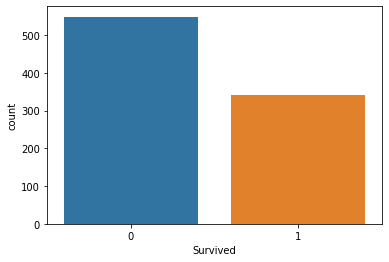

In [19]:
# 생존자수와 사망자 barplot, sns.countplot()사용

sns.countplot(x='Survived', data=titanic_df)
plt.show()

### 2) Pclass

In [24]:
# Pclass에 따른 인원 파악
titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [25]:
# 생존자 인원
titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [26]:
# 생존 비율
titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


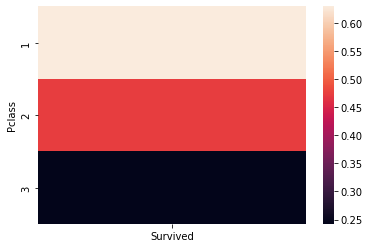

In [27]:
# 히트맵
sns.heatmap(titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean())
plt.show()

### 3) Sex

In [32]:
# 성별별
titanic_df.groupby(['Survived', 'Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

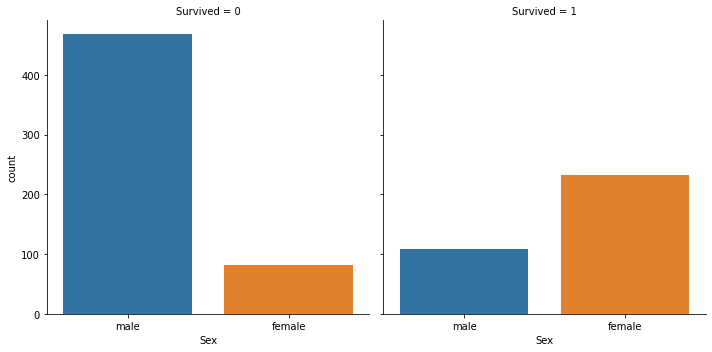

In [35]:
# catplot
sns.catplot(x='Sex', col='Survived', kind='count', data=titanic_df)
plt.show()

### 4) 나이
Remind: 결측치 존재

In [37]:
titanic_df.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

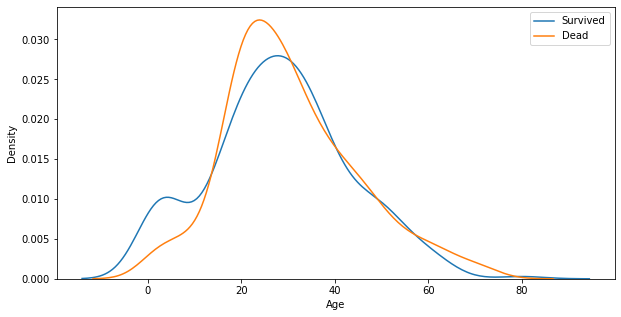

In [41]:
# 생존과 age의 경향성
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(x=titanic_df[titanic_df.Survived == 1]['Age'], ax=ax)
sns.kdeplot(x=titanic_df[titanic_df.Survived == 0]['Age'], ax=ax)
plt.legend(['Survived', 'Dead'])
plt.show()

### Appendix 1. Sex + Pclass vs Survived 

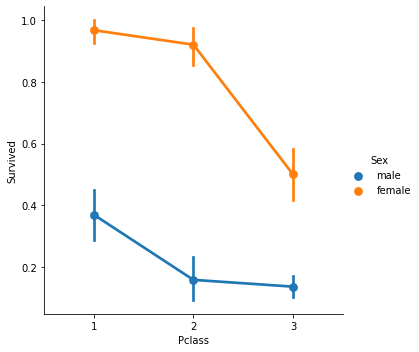

In [42]:
# 여러 Col에 따른 분석도 해보자
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='point', data=titanic_df)
plt.show()

### Appendix 2. Age + Pclass

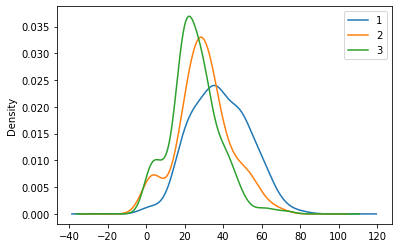

In [46]:
titanic_df['Age'][titanic_df.Pclass == 1].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 2].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 3].plot(kind='kde')
plt.legend([1,2,3])
plt.show()

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

- 가설 : 부모와 형제가 존재유무에 따라서 생존율의 차이가 있을것이다.  

In [64]:
# 부모와 형제가 존재하는지에 대한 데이터, 존재한다면 1, 그렇지 않다면 0
Additional_df = pd.DataFrame()
Additional_df['SibExist'] = titanic_df['SibSp'].apply(lambda x: 0 if x==0 else 1)
Additional_df['ParchExist'] = titanic_df['Parch'].apply(lambda x: 0 if x==0 else 1)
Additional_df['Survived'] = titanic_df['Survived']
Additional_df

,SibExist,ParchExist,Survived
0,1,0,0
1,1,0,1
2,0,0,1
3,1,0,1
4,0,0,0
...,...,...,...
886,0,0,0
887,0,0,1
888,1,1,0
889,0,0,1


In [98]:
# 형제의 유무에 따라서 생존율의 차이
Additional_df[['SibExist', 'Survived']].groupby(['SibExist']).mean()

,Survived
SibExist,
0,0.345395
1,0.466431


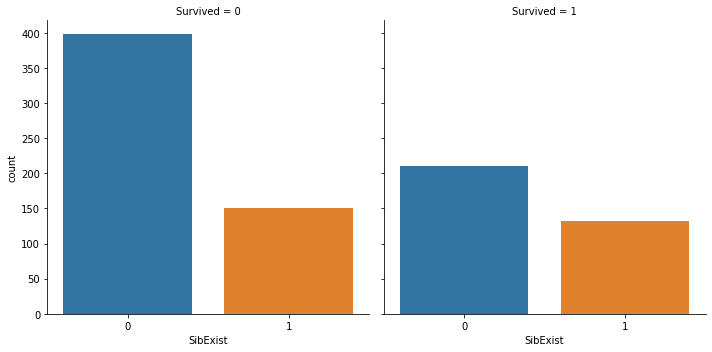

In [67]:
sns.catplot(x='SibExist', col='Survived', kind='count', data=Additional_df)
plt.show()

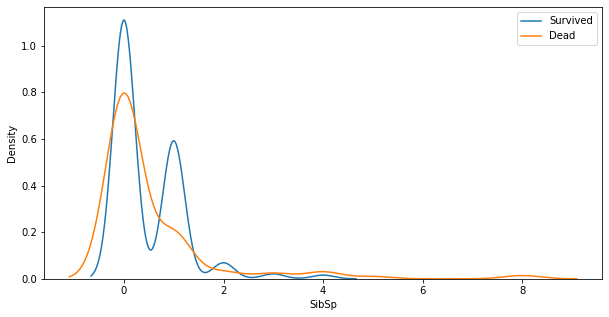

In [53]:
# 형제의 수에 따른 그래프
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(x=titanic_df[titanic_df.Survived == 1]['SibSp'], ax=ax)
sns.kdeplot(x=titanic_df[titanic_df.Survived == 0]['SibSp'], ax=ax)
plt.legend(['Survived', 'Dead'])
plt.show()

In [99]:
# 부모의 유무에 따라서 생존율의 차이
Additional_df[['ParchExist', 'Survived']].groupby(['ParchExist']).mean()

,Survived
ParchExist,
0,0.343658
1,0.511737


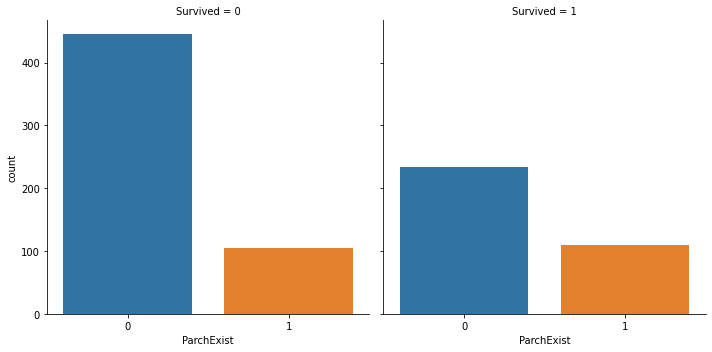

In [68]:
sns.catplot(x='ParchExist', col='Survived', kind='count', data=Additional_df)
plt.show()

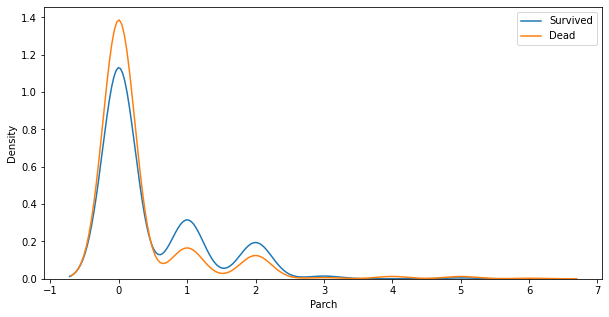

In [54]:
# 부모의 수에 따른 그래프
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(x=titanic_df[titanic_df.Survived == 1]['Parch'], ax=ax)
sns.kdeplot(x=titanic_df[titanic_df.Survived == 0]['Parch'], ax=ax)
plt.legend(['Survived', 'Dead'])
plt.show()

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn](https://seaborn.pydata.org/index.html)
- [matplotlib]()

### 

In [190]:
hostel_df = pd.read_csv('./dataset/Hostel.csv')
hostel_df.head()

,Unnamed: 0,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
0,1,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,2,& And Hostel,Fukuoka-City,2600,0.7km from city centre,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN
2,3,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,4,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,5,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898


In [191]:
# Distance Col에서 영어 제거
hostel_df['Distance']=hostel_df['Distance'].apply(lambda x: float(x[:x.index('k')]))
hostel_df.head()

,Unnamed: 0,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
0,1,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,2,& And Hostel,Fukuoka-City,2600,0.7,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN
2,3,&And Hostel Akihabara,Tokyo,3600,7.8,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,4,&And Hostel Ueno,Tokyo,2600,8.7,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,5,&And Hostel-Asakusa North-,Tokyo,1500,10.5,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898


In [192]:
hostel_df.dtypes

Unnamed: 0         int64
hostel.name       object
City              object
price.from         int64
Distance         float64
summary.score    float64
rating.band       object
atmosphere       float64
cleanliness      float64
facilities       float64
location.y       float64
security         float64
staff            float64
valueformoney    float64
lon              float64
lat              float64
dtype: object

In [193]:
hostel_df.describe()

,Unnamed: 0,price.from,Distance,summary.score,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
count,342.000000,3.420000e+02,342.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,298.000000,298.000000
mean,171.500000,8.388012e+03,5.723099,8.782569,8.238838,9.011927,8.597554,8.694801,8.947401,9.133333,8.848318,136.756376,34.976583
std,98.871128,7.641527e+04,4.590794,0.960909,1.382002,1.215775,1.285356,1.102703,1.114345,1.086513,1.047809,3.251995,2.040896
min,1.000000,1.000000e+03,0.000000,3.100000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,103.873135,1.310820
25%,86.250000,2.000000e+03,2.300000,8.600000,7.800000,8.800000,8.000000,8.000000,8.700000,9.000000,8.600000,135.505314,34.668900
50%,171.500000,2.500000e+03,4.500000,9.000000,8.600000,9.300000,9.000000,9.000000,9.200000,9.400000,9.000000,135.761617,34.998470
75%,256.750000,2.900000e+03,8.450000,9.400000,9.000000,9.800000,9.300000,9.400000,9.600000,9.800000,9.500000,139.770187,35.696709
max,342.000000,1.003200e+06,36.600000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,139.877880,36.204824


In [194]:
hostel_df.isnull().sum()

Unnamed: 0        0
hostel.name       0
City              0
price.from        0
Distance          0
summary.score    15
rating.band      15
atmosphere       15
cleanliness      15
facilities       15
location.y       15
security         15
staff            15
valueformoney    15
lon              44
lat              44
dtype: int64

<AxesSubplot:>

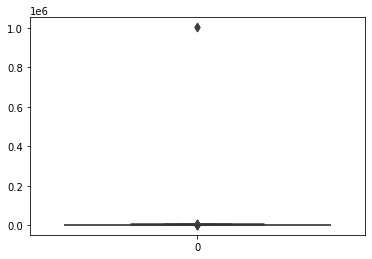

In [196]:
# 가격의 이상치 탐지
sns.boxenplot(data=hostel_df['price.from'])

In [197]:
hostel_df['price.from'].sort_values(ascending=False).head()

289    1003200
316    1003200
300       7600
199       6500
310       6300
Name: price.from, dtype: int64

In [202]:
hostel_df.drop(hostel_df.loc[hostel_df['price.from'] == 1003200].index, axis=0, inplace=True)
hostel_df['price.from'].sort_values(ascending=False).head()

300    7600
199    6500
310    6300
44     6200
45     6000
Name: price.from, dtype: int64

<AxesSubplot:>

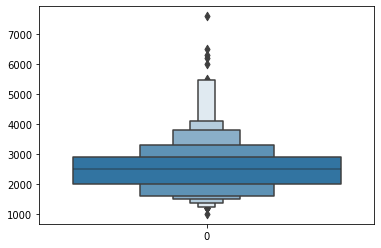

In [204]:
sns.boxenplot(data=hostel_df['price.from'])

### 가설 1: 지역에 따라 가격의 평균값이 차이가 날 것이다.

In [205]:
hostel_df[['City','price.from']].groupby(['City']).mean()

,price.from
City,
Fukuoka-City,2736.842105
Hiroshima,2578.571429
Kyoto,2293.589744
Osaka,2391.262136
Tokyo,2769.841270


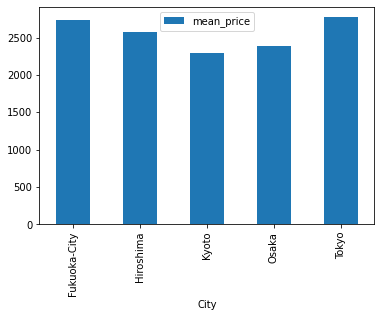

In [206]:
hostel_df[['City','price.from']].groupby(['City']).mean().plot(kind='bar')
plt.legend(['mean_price'])
plt.show()

In [264]:
new_df = hostel_df[['Distance', 'price.from']].groupby('Distance').mean()
new_df

,price.from
Distance,
0.0,4600.0
0.3,4300.0
0.4,2500.0
0.5,2475.0
0.6,2300.0
...,...
18.5,3000.0
20.3,2900.0
26.6,2200.0


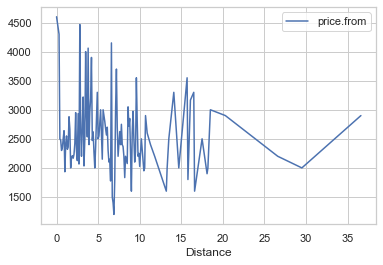

In [265]:
sns.lineplot(data=new_df)
plt.show()

### 전체적인 rating과 가격의 관계 

In [255]:
new_df = hostel_df[['summary.score', 'cleanliness', 'facilities', 'staff','price.from']]
new_df = new_df.groupby('price.from').mean()
new_df = new_df.dropna()

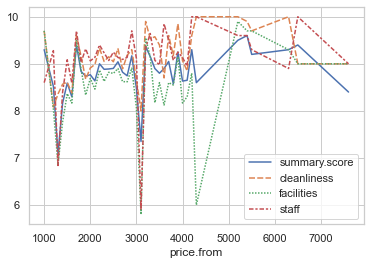

In [256]:
sns.set_theme(style='whitegrid')
sns.lineplot(data=new_df)
plt.show()

# 가격과 점수는 상관이 없는것 같다.

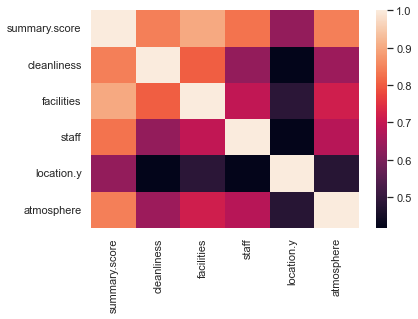

In [273]:
# 각각의 세부점수와 전체 평가
new_df = hostel_df[['summary.score', 'cleanliness', 'facilities', 'staff','location.y','atmosphere']]

sns.heatmap(data=new_df.corr())
plt.show()